# First steps with MaRGE3D

To use the solver, first define the simulation parameters :

In [1]:
import numpy as np
from marge3d.params import DaitcheParameters

particle_density    = 1410
fluid_density       = 972
particle_radius     = 0.0015
kinematic_viscosity = 2 * 1e-4
time_scale          = 0.0125
char_vel            = 0.4

par = DaitcheParameters(
    particle_density, fluid_density, particle_radius,
    kinematic_viscosity, time_scale, char_vel)

All the main problem parameters can be extracted from this `DaitcheParameters` class :

In [2]:
print("G = ", par.g)
print("R = ", par.R)
print("S = ", par.S)

G =  0.30625
R =  0.7689873417721519
S =  0.3


Then, we can define the time-stepping parameter and initial velocity field for the simulation :

In [3]:
from marge3d.fields import VelocityField3D

# Time-stepping
T_ini  = 0
T_fin  = 10
T      = T_fin - T_ini
N     = 100

# Initial velocity field
vortex = VelocityField3D(1)
R0     = np.array([1, 0, 0])
W0     = np.array([0, 0, 0])
V0    = vortex.get_velocity(R0[0], R0[1], R0[2], T_ini)

And finally, build the solver using the `Euler` time-integration method ($1^{st}$ order) :

In [4]:
from marge3d.numeric import NumericalSolver

order = 1
solver = NumericalSolver(R0, W0, vortex, N, order,
    particle_density, fluid_density, particle_radius,
    kinematic_viscosity, time_scale, char_vel)

Now, on can simply call the adapted method to run the simulation :

In [5]:
t_v = np.linspace(T_ini, T_fin, N)
R_x, R_y, R_z, W = solver.Euler(t_v, flag=True)

The 3D solution can be plot using Matplotlib :

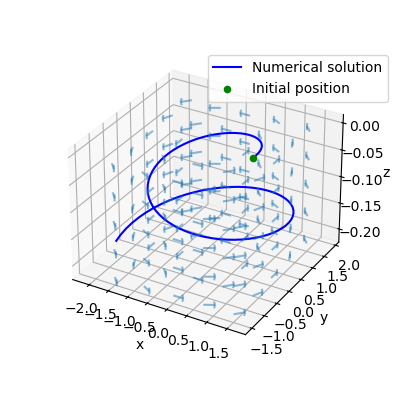

In [6]:
import matplotlib.pyplot as plt

x, y, z = np.meshgrid(
    np.linspace(-1.5, 1.5, 5),
    np.linspace(-1.5, 1.5, 5),
    np.linspace(-0.21, 0, 5)
)

u, v, w = vortex.get_velocity(x, y, z, T_fin)

fig = plt.figure()
# size of the figure
fig.set_size_inches(5, 5)
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D line
plt.plot(R_x, R_y, R_z, color="blue", label='Numerical solution')
ax.scatter(1, 0, 0, color='green', label='Initial position')
ax.quiver(x, y, z, u, v, w, length=0.25, normalize=True, arrow_length_ratio=0.1, alpha=0.5)

# Add labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

# Show the plot
ax.set_box_aspect(None, zoom=0.8)